In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler ,LabelEncoder
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix,ConfusionMatrixDisplay,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [51]:
df=pd.read_excel('HBFC_Bank.xlsx',sheet_name="Bank_Personal_Loan_Modelling")

In [52]:
df.head()

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,FM,Education,Mortgage,Personal Loan,Securities Account,TD Account,Online,CreditCard
0,15,67,41,112,100+,91741,1,2.0,1,Undergraduate,0,No,Yes,No,No,No
1,1481,67,42,32,0-50,93943,1,1.1,1,Professional,0,No,No,No,No,Yes
2,1860,67,41,20,0-50,91741,2,0.4,2,Undergraduate,80,No,No,No,No,No
3,2847,67,43,105,100+,93711,4,1.7,4,Graduate,0,No,No,No,Yes,No
4,3265,67,41,114,100+,95616,4,2.4,4,Professional,0,No,No,No,Yes,No


In [53]:
df.isna().sum()

ID                       0
Age (in years)           0
Experience (in years)    0
Income (in K/year)       0
Income Categorical       0
ZIP Code                 0
Family members           0
CCAvg                    0
FM                       0
Education                0
Mortgage                 0
Personal Loan            0
Securities Account       0
TD Account               0
Online                   0
CreditCard               0
dtype: int64

In [54]:
df=df.drop('ID',axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (in years)         5000 non-null   int64  
 1   Experience (in years)  5000 non-null   int64  
 2   Income (in K/year)     5000 non-null   int64  
 3   Income Categorical     5000 non-null   object 
 4   ZIP Code               5000 non-null   int64  
 5   Family members         5000 non-null   int64  
 6   CCAvg                  5000 non-null   float64
 7   FM                     5000 non-null   int64  
 8   Education              5000 non-null   object 
 9   Mortgage               5000 non-null   int64  
 10  Personal Loan          5000 non-null   object 
 11  Securities Account     5000 non-null   object 
 12  TD Account             5000 non-null   object 
 13  Online                 5000 non-null   object 
 14  CreditCard             5000 non-null   object 
dtypes: f

In [56]:
df.describe()

,Age (in years),Experience (in years),Income (in K/year),ZIP Code,Family members,CCAvg,FM,Mortgage
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.13480,73.774200,93152.503000,2.392200,1.937938,2.392200,56.498800
std,11.463166,11.41488,46.033729,2121.852197,1.148148,1.747659,1.148148,101.713802
min,23.000000,0.00000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000
25%,35.000000,10.00000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000
50%,45.000000,20.00000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000
75%,55.000000,30.00000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000
max,67.000000,43.00000,224.000000,96651.000000,4.000000,10.000000,4.000000,635.000000


In [57]:
df.describe(include='object')

,Income Categorical,Education,Personal Loan,Securities Account,TD Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000,5000
unique,3,3,2,2,2,2,2
top,0-50,Undergraduate,No,No,No,Yes,No
freq,1914,2096,4520,4478,4698,2984,3530


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

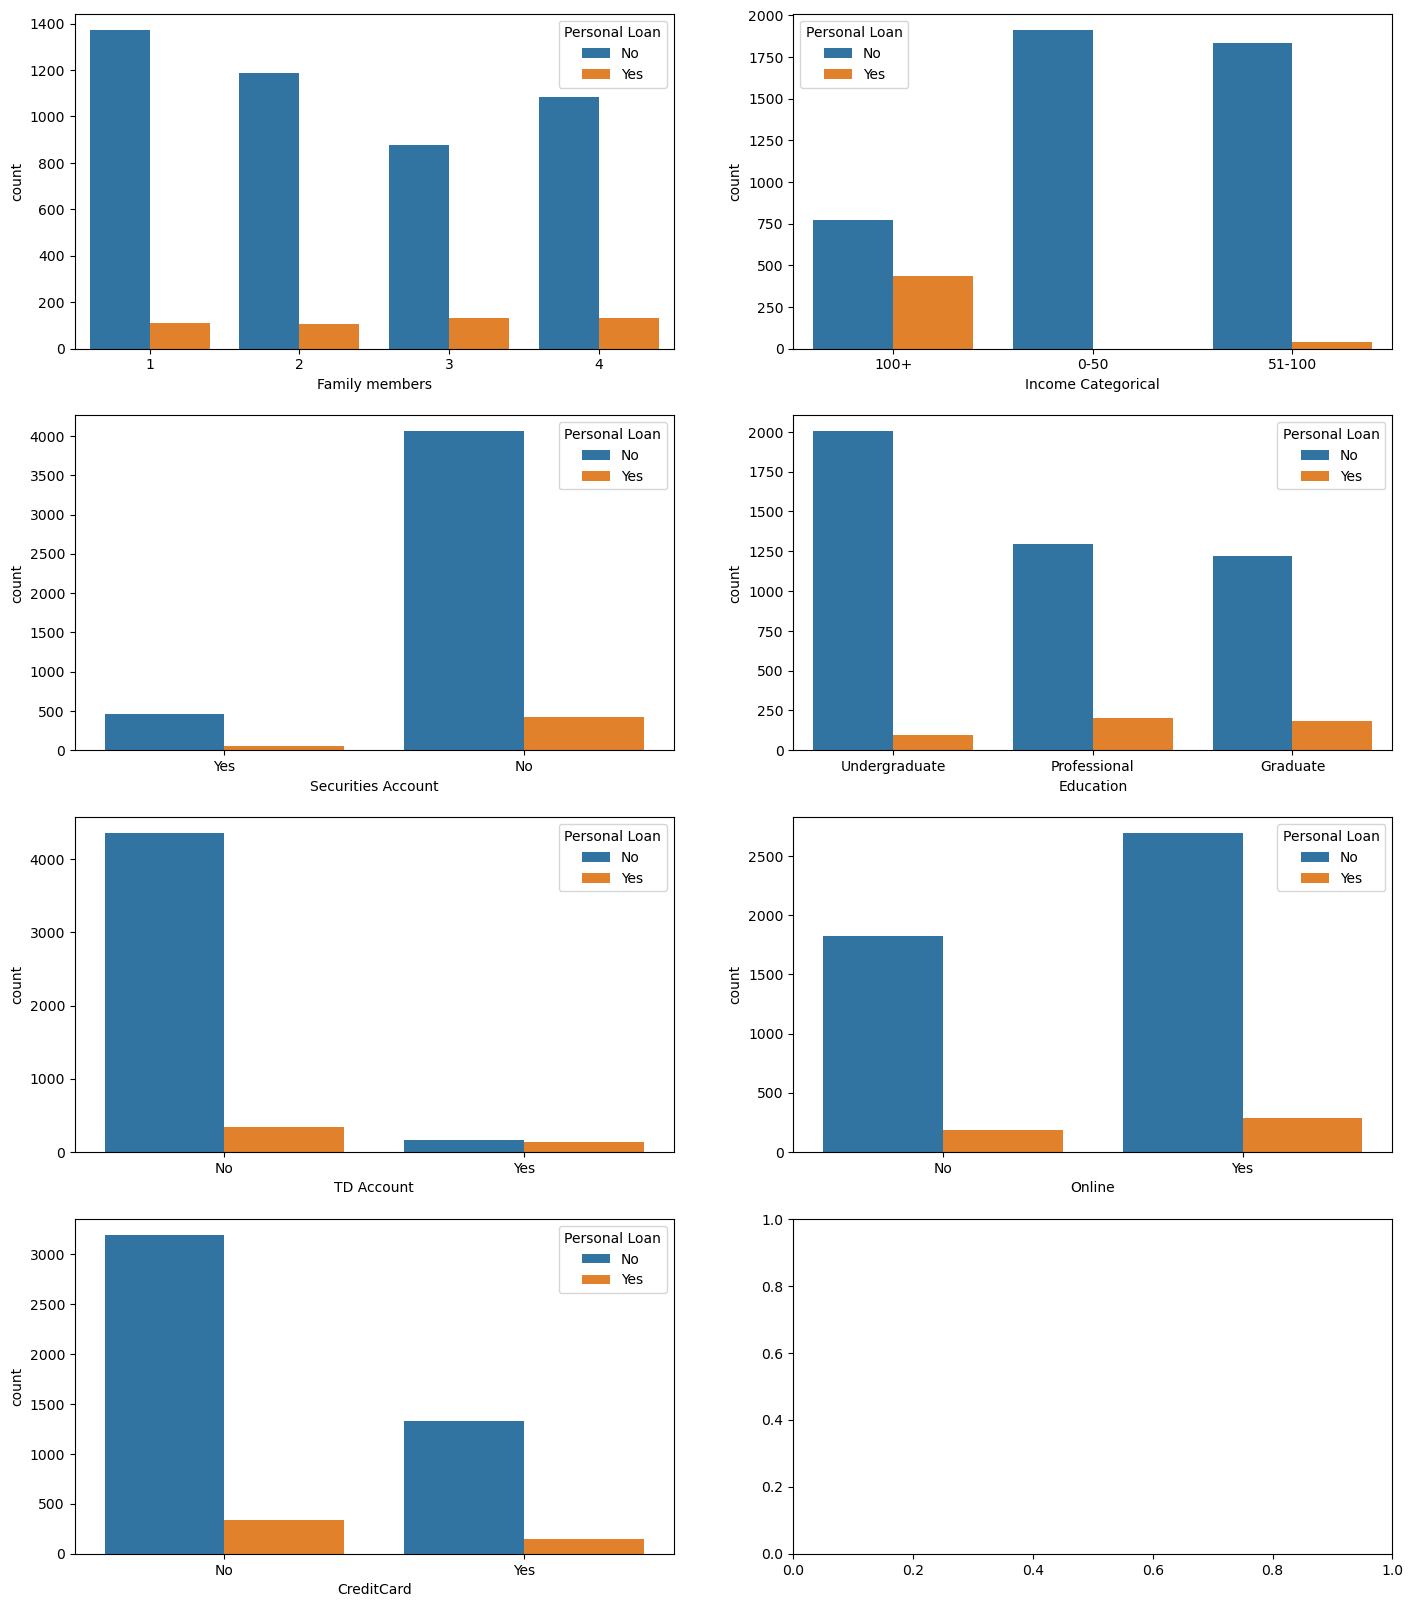

In [58]:
fig,axes = plt.subplots(4,2,figsize=(17,20))
sns.countplot(x='Family members',data=df,hue='Personal Loan',ax=axes[0,0])
sns.countplot(x='Income Categorical',data=df,hue='Personal Loan',ax=axes[0,1])

sns.countplot(x='Education',data=df,hue='Personal Loan',ax=axes[1,1])
sns.countplot(x='Securities Account',data=df,hue='Personal Loan',ax=axes[1,0])
sns.countplot(x='TD Account',data=df,hue='Personal Loan',ax=axes[2,0])
sns.countplot(x='Online',data=df,hue='Personal Loan',ax=axes[2,1])
sns.countplot(x='CreditCard',data=df,hue='Personal Loan',ax=axes[3,0])

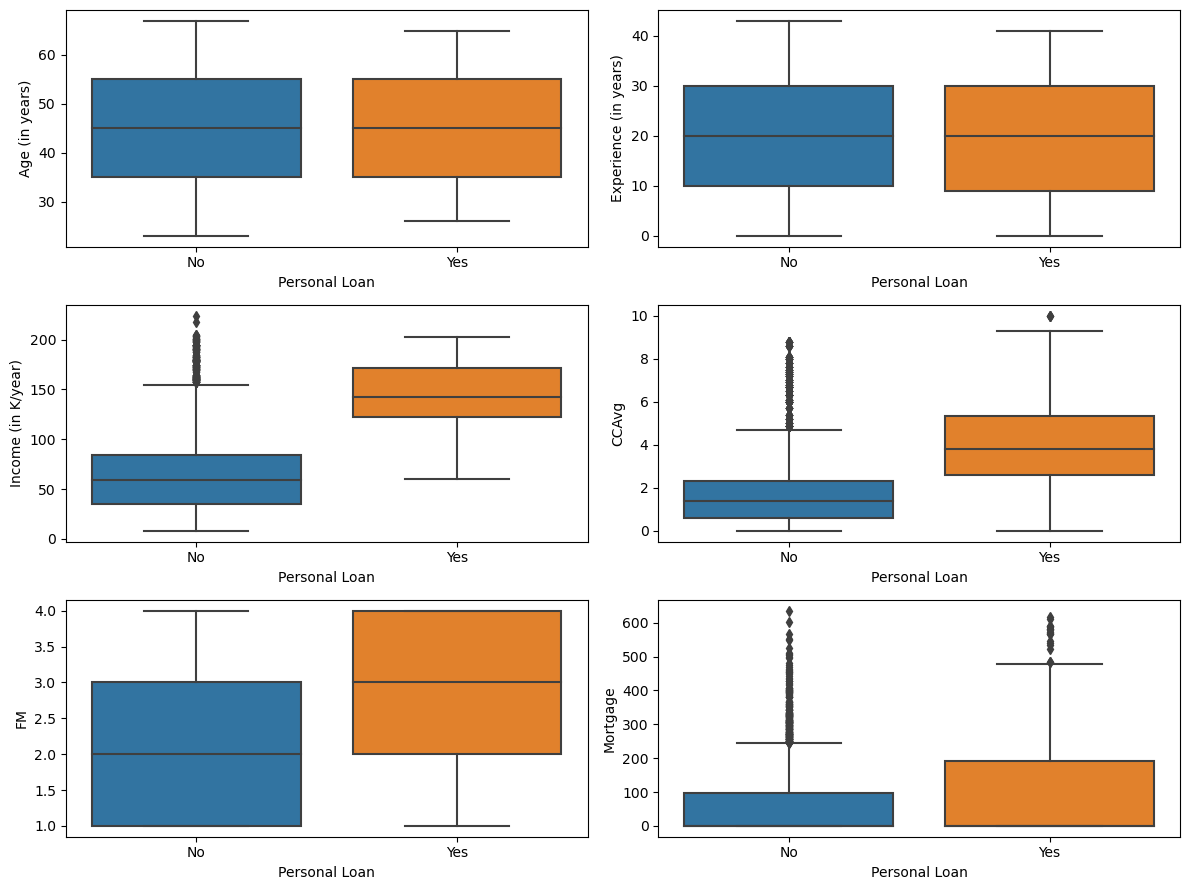

In [59]:
fig,axes = plt.subplots(3,2,figsize=(12,9))
sns.boxplot(y='Age (in years)',data=df,x='Personal Loan',ax=axes[0,0])
sns.boxplot(y='Experience (in years)',data=df,x='Personal Loan',ax=axes[0,1])
sns.boxplot(y='Income (in K/year)',data=df,x='Personal Loan',ax=axes[1,0])
sns.boxplot(y='CCAvg',data=df,x='Personal Loan',ax=axes[1,1])
sns.boxplot(y='FM',data=df,x='Personal Loan',ax=axes[2,0])
sns.boxplot(y='Mortgage',data=df,x='Personal Loan',ax=axes[2,1])
fig.tight_layout()

In [60]:
df_num=df[['Age (in years)','Experience (in years)','Income (in K/year)','CCAvg','FM','Mortgage']]

In [61]:
df_cat=df[['Family members','Education','Securities Account','TD Account','Online','CreditCard']]

In [62]:
# Outlier handling
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-IQR
upper_bound=Q3+IQR

In [63]:
df=df[~((df_num <lower_bound) | (df_num>upper_bound)).any(axis=1)]

In [64]:
df_num=df[['Age (in years)','Experience (in years)','Income (in K/year)','CCAvg','FM','Mortgage']]

In [65]:
df_cat=df[['Family members','Education','Securities Account','TD Account','Online','CreditCard']]

<AxesSubplot:>

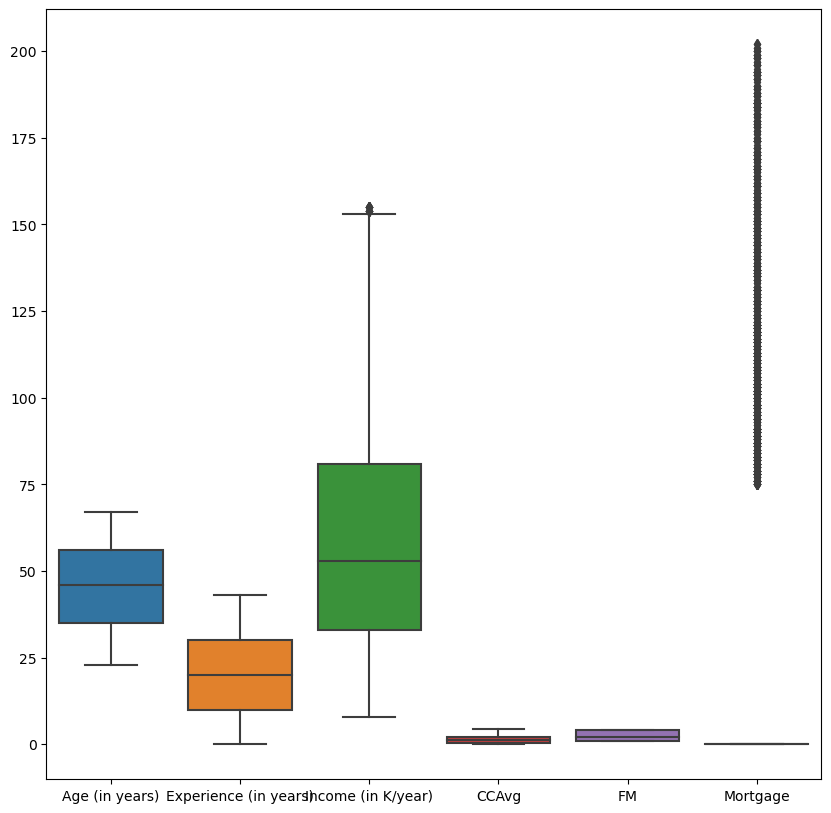

In [66]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_num)

<AxesSubplot:>

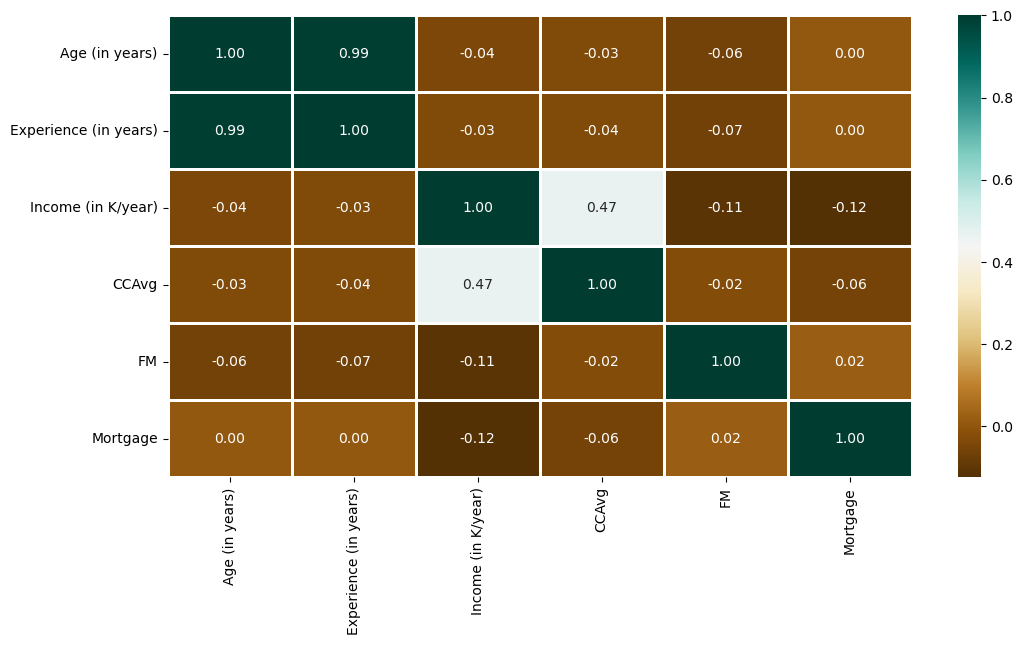

In [67]:
plt.figure(figsize=(12,6))  
sns.heatmap(df_num.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

In [68]:
# One-hot encoding
df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat=df_cat.reset_index()
df_cat.head()

,index,Family members,Education_Professional,Education_Undergraduate,Securities Account_Yes,TD Account_Yes,Online_Yes,CreditCard_Yes
0,0,1,0,1,1,0,0,0
1,1,1,1,0,0,0,0,1
2,2,2,0,1,0,0,0,0
3,3,4,0,0,0,0,1,0
4,4,4,1,0,0,0,1,0


In [69]:
# Min-max scaler
scalar=MinMaxScaler()
df_encoded_num=scalar.fit_transform(df_num)
df_num_encoded=pd.DataFrame(df_encoded_num,columns=df_num.columns)
df_num_encoded=df_num_encoded.reset_index()
df_num_encoded.head()

,index,Age (in years),Experience (in years),Income (in K/year),CCAvg,FM,Mortgage
0,0,1.0,0.953488,0.707483,0.465116,0.000000,0.00000
1,1,1.0,0.976744,0.163265,0.255814,0.000000,0.00000
2,2,1.0,0.953488,0.081633,0.093023,0.333333,0.39604
3,3,1.0,1.000000,0.659864,0.395349,1.000000,0.00000
4,4,1.0,0.953488,0.721088,0.558140,1.000000,0.00000


In [70]:
# getting the features
X=pd.concat([df_cat,df_num_encoded],axis=1)
X=X.drop('index',axis=1)

In [71]:
# Label
y=df[['Personal Loan']]
le=LabelEncoder()
y_enc=le.fit_transform(y)
y_enc=pd.DataFrame(y_enc,columns=y.columns)
y_enc.value_counts()

Personal Loan
0                3829
1                 159
dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.33, random_state=42)

In [73]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((2671, 13), (1317, 13), (1317, 1), (2671, 1))

### KNN-Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn=KNeighborsClassifier()
model=knn.fit(X_train,y_train)

In [76]:
pred_train=model.predict(X_train)

In [77]:
pred_test=model.predict(X_test)

Training Data Set Accuracy:  0.9655559715462374
Training Data Set Recall:  0.20689655172413793
Training Data Set Precision:  1.0
Training Data F1 Score  0.34285714285714286
confusion matrix
       0   1
0  2555   0
1    92  24


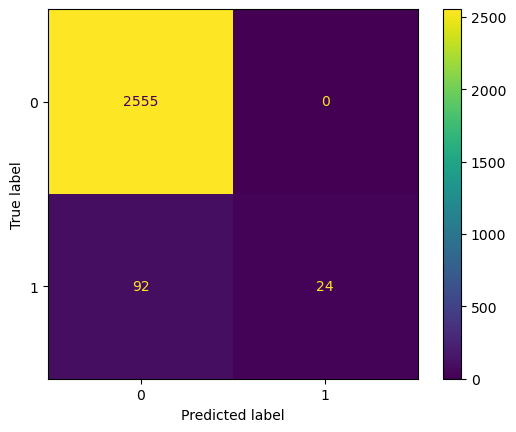

In [78]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,pred_train))
print("Training Data Set Recall: ", recall_score(y_train,pred_train))
print("Training Data Set Precision: ", precision_score(y_train,pred_train))
print("Training Data F1 Score ", f1_score(y_train,pred_train))
cm=confusion_matrix(y_train,pred_train)
print("confusion matrix\n",pd.DataFrame(cm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
disp.plot()

Testing Data Set Accuracy:  0.9681093394077449
Testing Data Set Recall:  0.046511627906976744
Testing Data Set Precision:  0.6666666666666666
Testing Data F1 Score  0.08695652173913045
confusion matrix
       0  1
0  1273  1
1    41  2


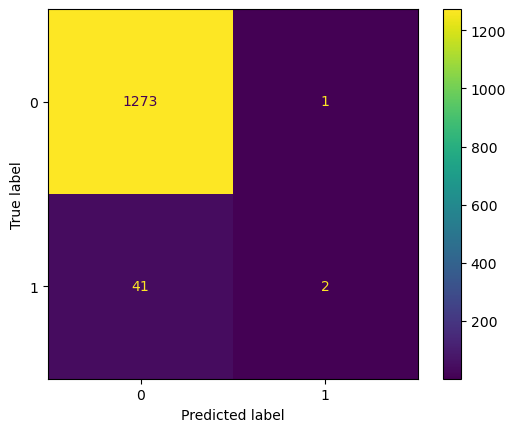

In [79]:
print("Testing Data Set Accuracy: ", accuracy_score(y_test,pred_test))
print("Testing Data Set Recall: ", recall_score(y_test,pred_test))
print("Testing Data Set Precision: ", precision_score(y_test,pred_test))
print("Testing Data F1 Score ", f1_score(y_test,pred_test))
cm=confusion_matrix(y_test,pred_test)
print("confusion matrix\n",pd.DataFrame(cm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
disp.plot()

In [80]:
prob=model.predict_proba(X_test)[:,1]
prob

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [82]:
for i in np.arange(0,1.1,0.1):
    y_pred = (prob > i).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': i, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})
df_ROC
auc=roc_auc_score(y_test, prob)

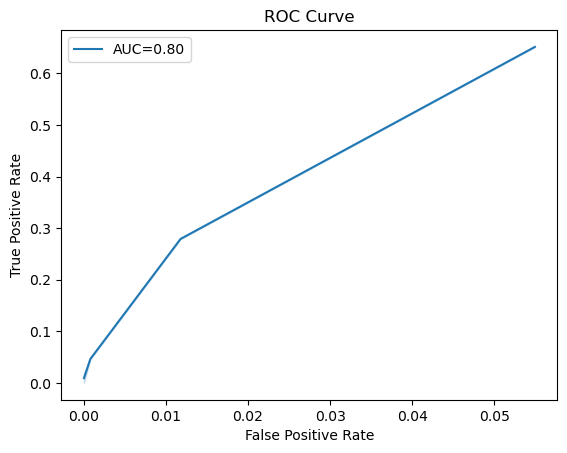

In [83]:
sns.lineplot(y=df_ROC['TPR'],x=df_ROC['FPR'],label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [84]:
# Compute TPR - FPR
df_ROC['TPR-FPR'] = df_ROC['TPR'] - df_ROC['FPR']
# Select threshold with max TPR - FPR
max_TPR_FPR_diff = df_ROC['TPR-FPR'].max()
selected_threshold = df_ROC[df_ROC['TPR-FPR'] == max_TPR_FPR_diff]['Threshold'].values[0]
selected_threshold

0.0

### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr=LogisticRegression()
logreg=lr.fit(X_train,y_train)

In [87]:
sklearn_coef = logreg.coef_[0][0]
sklearn_intercept = logreg.intercept_[0]

In [88]:
sklearn_coef,sklearn_intercept

(0.18520278649928612, -7.514825892038283)

In [89]:
logreg.score(X_train,y_train)

0.9737925870460502

In [90]:
y_pred=logreg.predict(X_test)

Testing Data Set Accuracy:  0.9749430523917996
Testing Data Set Recall:  0.3023255813953488
Testing Data Set Precision:  0.8125
Testing Data F1 Score  0.44067796610169485
confusion matrix
       0   1
0  1271   3
1    30  13


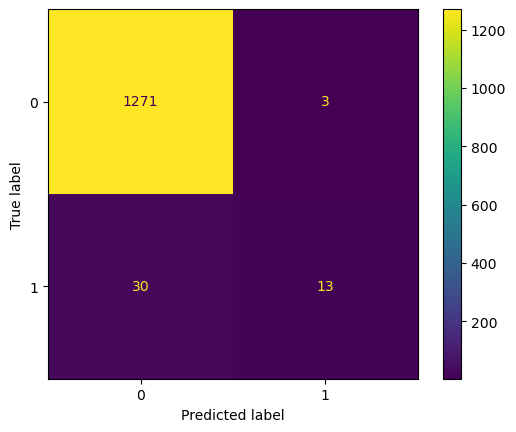

In [91]:
print("Testing Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Testing Data Set Recall: ", recall_score(y_test,y_pred))
print("Testing Data Set Precision: ", precision_score(y_test,y_pred))
print("Testing Data F1 Score ", f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n",pd.DataFrame(cm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
disp.plot()

In [92]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [93]:
prob=logreg.predict_proba(X_test)[:,1]
prob

array([0.00284831, 0.01673464, 0.0159681 , ..., 0.00106477, 0.01781303,
       0.00256974])

In [94]:
for i in np.arange(0,1.1,0.1):
    y_pred = (prob > i).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': i, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})
df_ROC
auc=roc_auc_score(y_test, prob)

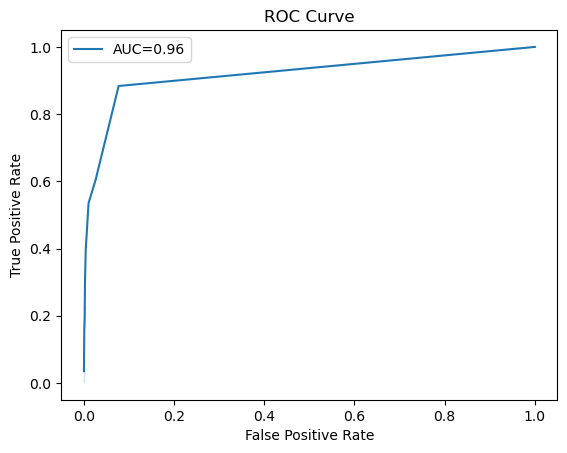

In [95]:
sns.lineplot(y=df_ROC['TPR'],x=df_ROC['FPR'],label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [96]:
# Compute TPR - FPR
df_ROC['TPR-FPR'] = df_ROC['TPR'] - df_ROC['FPR']
# Select threshold with max TPR - FPR
max_TPR_FPR_diff = df_ROC['TPR-FPR'].max()
selected_threshold = df_ROC[df_ROC['TPR-FPR'] == max_TPR_FPR_diff]['Threshold'].values[0]
selected_threshold

0.1